- https://www.datacamp.com/community/tutorials/wordcloud-python : Wordcloud Creation
- https://airbnb-pricing-prediction.herokuapp.com/ : Idea about which NaN values to remove and how
- https://cseweb.ucsd.edu/classes/wi17/cse258-a/reports/a043.pdf
- https://arxiv.org/pdf/1805.12101.pdf

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,median_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option("max_r",102)
pd.set_option("display.max_columns",500)

In [2]:
#read data
airbnb = pd.read_csv('/Users/user/Desktop/AIRBNB/listings.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

In [3]:
#Check shape
airbnb.shape

(33430, 96)

In [4]:
# categorical_features = airbnb.select_dtypes(include = ["object"]).columns
# numerical_features = airbnb.select_dtypes(exclude = ["object"]).columns
# print("Numerical features : " + str(len(numerical_features)))
# print(numerical_features)
# print('-'*100)
# print("Categorical features : " + str(len(categorical_features)))
# print(categorical_features)    

In [5]:
print('HEAD:')
display(airbnb.head(3))

HEAD:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11154941,https://www.airbnb.com/rooms/11154941,20181006000730,2018-10-06,Newtown room in friendly house,"Hello, my private room is available for only 3...",NaN,"Hello, my private room is available for only 3...",none,Super quiet at night and we like it like that....,NaN,Macdonaldtown train station is a 2mins walk (t...,"You can access your room, kitchen, both toilet...",I won't be there as I'm leaving for a couple w...,"Guests are not allowed in the house, mates' ru...",NaN,NaN,https://a0.muscache.com/im/pictures/7c477884-1...,NaN,573182,https://www.airbnb.com/users/show/573182,Felipe,2011-05-10,"New South Wales, Australia",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/197de713-0...,https://a0.muscache.com/im/pictures/197de713-0...,Newtown/Enmore,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Newtown, NSW, Australia",Newtown/Enmore,Sydney,NaN,Newtown,NSW,2042,Sydney,"Newtown, Australia",AU,Australia,-33.895492,151.187311,t,House,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Smok...",NaN,$33.00,NaN,NaN,$135.00,$10.00,1,$0.00,6,20,32 months ago,t,0,0,0,0,2018-10-06,1,2016-02-16,2016-02-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,flexible,f,f,1,0.03
1,11169113,https://www.airbnb.com/rooms/11169113,20181006000730,2018-10-06,Three White Hall,Built in 1877 and once home to Australia's fir...,Accessible through a hallway and staircase thi...,Built in 1877 and once home to Australia's fir...,none,We are located 5 minutes by bus to the famous ...,Iron board/iron and hair dryer are provided wi...,"We are very close to public transport, there i...",The guest suite is accessed through a separate...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b2695c51-c...,NaN,56897899,https://www.airbnb.com/users/show/56897899,Selena,2016-01-31,"Sydney, New South Wales, Australia",NaN,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/5cdfbe91-4...,https://a0.muscache.com/im/pictures/5cdfbe91-4...,Balgowlah,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Balgowlah, NSW, Australia",Balgowlah,Manly,NaN,Balgowlah,NSW,2093,Sydney,"Balgowlah, Australia",AU,Australia,-33.796060,151.261637,t,Guest suite,Entire home/apt,5,1.0,2.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$245.00,NaN,NaN,$300.00,$100.00,1,$0.00,1,1125,3 days ago,t,19,49,78,78,2018-10-06,8,2016-12-02,2018-10-03,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.36
2,12119402,https://www.airbnb.com/rooms/121

In [6]:
# #Null Values
# print('NULL Values:')
# print("Percentage NAs for numerical features in training dataset : " + \
#       str((airbnb[numerical_features].isnull().values.sum()/airbnb.isnull().count().values.sum())*100)+'%')
# print("Percentage NAs for categorical features in training dataset : " + \
#       str((airbnb[categorical_features].isnull().values.sum()/airbnb.isnull().count().values.sum())*100)+'%')
# print('-'*100)
# print('Top NULL Values:')
# print(airbnb.isnull().sum().sort_values(ascending = False)[:20])

In [7]:
def missing_values_table(df):
    """Function to calculate missing values by column"""
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
#check percentage missing values
missing_values_table(airbnb).head(15)

Your selected dataframe has 96 columns.
There are 54 columns that have missing values.


,Missing Values,% of Total Values
host_acceptance_rate,33430,100.0
thumbnail_url,33430,100.0
neighbourhood_group_cleansed,33430,100.0
xl_picture_url,33430,100.0
medium_url,33430,100.0
jurisdiction_names,33429,100.0
license,33366,99.8
square_feet,33171,99.2
monthly_price,31138,93.1
weekly_price,29658,88.7


**Handling Missing Values**

In [9]:
#drop columns with >60% null values
print("Number of columns in our dataframe: {:d}".format(airbnb.shape[1]))
thresh = len(airbnb) * 0.4
airbnb = airbnb.dropna(thresh=thresh,axis=1)
print("Number of columns left in our dataframe after drop: {:d}". \
      format(airbnb.shape[1]))

Number of columns in our dataframe: 96
Number of columns left in our dataframe after drop: 86


Your selected dataframe has 86 columns.
There are 44 columns that have missing values.


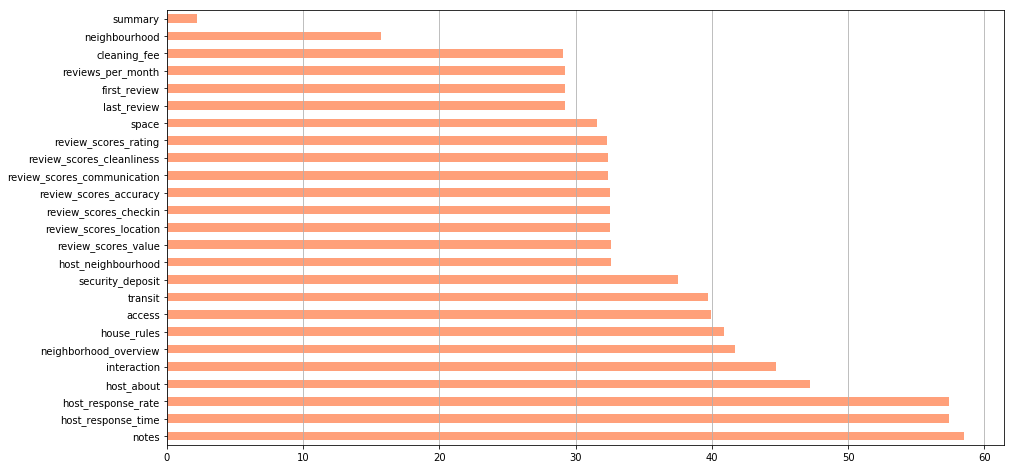

In [10]:
#plot missing columns
fig,ax = plt.subplots(figsize = (15,8))
missing_values_table(airbnb)['% of Total Values'].head(25).plot(kind = 'barh', color = 'lightsalmon');
ax.grid(axis = 'x')

In [11]:
#important columns 
feature_cols = [
    'id',
    'name',
    'description',
    'zipcode',
    'host_response_time',
    'host_response_rate',
    'host_is_superhost',
    'street',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'instant_bookable',
    'price',
    'cancellation_policy',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'bathrooms',
    'number_of_reviews'
]
drop_list = airbnb.drop(feature_cols, axis = 1).columns

airbnb.drop(drop_list,axis = 1,inplace = True)

In [12]:
cols = airbnb.drop(['host_response_time','host_response_rate','review_scores_rating'], 
               axis = 1).columns

In [13]:
missing_values_table(airbnb)

Your selected dataframe has 24 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
host_response_time,19181,57.4
host_response_rate,19181,57.4
review_scores_rating,10809,32.3
description,300,0.9
zipcode,176,0.5
host_is_superhost,83,0.2
host_listings_count,83,0.2
beds,40,0.1
bathrooms,22,0.1
name,13,0.0


1. We will drop all null values except `host_response_time`, `host_response_rate` and `review_scores_rating`.
2. We will convert the format in price from $1.00 into a float of 1.00 for further analysis in the future.
3. We also drop any entries that are inconsistent; i.e. predictors accommodates, bedrooms, beds, or price with a value of 0.

In [14]:
# remove NaN values from dataframe
original_length = len(airbnb)

airbnb = airbnb.dropna(how='any', subset=['id', 'name', 'description', 'zipcode', 'host_is_superhost',
                                          'street', 'property_type', 'room_type', 'accommodates', 'bedrooms',
                                          'instant_bookable', 'beds', 'bed_type', 'price', 'number_of_reviews', 
                                          'host_listings_count','availability_30', 'minimum_nights', 
                                          'bathrooms','cancellation_policy'])
print('Number of Null Values values removed:', original_length - len(airbnb))

# convert formatting for price
airbnb['price'] = (airbnb['price'].str.replace(r'[^-+\d.]', '').astype(float))

# check inconsistent values
print('Number of Accommodates=0:', len(airbnb[airbnb['accommodates'] == 0]))
print('Number of Bedrooms=0:', len(airbnb[airbnb['bedrooms'] == 0]))
print('Number of Beds=0:', len(airbnb[airbnb['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(airbnb[airbnb['price'] == 0.00]))

# # drop inconsistent values
airbnb = airbnb[airbnb['accommodates'] != 0]
airbnb = airbnb[airbnb['bedrooms'] != 0]
airbnb = airbnb[airbnb['beds'] != 0]
airbnb = airbnb[airbnb['price'] != 0.00]

#replace superhost with 0,1 for False,True
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].map({'f': 0, 't': 1})
airbnb['instant_bookable'] = airbnb['instant_bookable'].map({'f': 0, 't': 1})

#response rate
airbnb['host_response_rate'] = (airbnb['host_response_rate'].str.replace(r'[^-+\d.]', '').astype(float))

Number of Null Values values removed: 617
Number of Accommodates=0: 0
Number of Bedrooms=0: 1834
Number of Beds=0: 130
Number of Listings with Price $0.00: 10


In [15]:
missing_values_table(airbnb)

Your selected dataframe has 24 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
host_response_time,17810,57.7
host_response_rate,17810,57.7
review_scores_rating,9920,32.2


Finally our dataset is clean. 

**Reviews Data Set**

In [16]:
reviews = pd.read_csv('/Users/user/Desktop/AIRBNB/reviews.csv')

In [17]:
missing_values_table(reviews).head()

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
comments,468,0.1


In [18]:
reviews.dropna(inplace = True)

## Exploratory Data Analysis

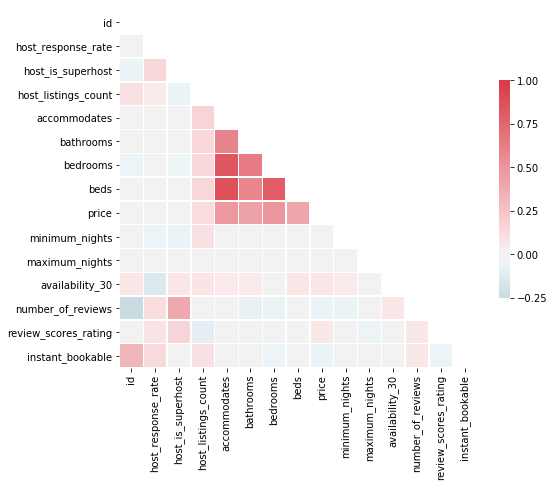

In [19]:
corr = airbnb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
a = sns.heatmap(corr, mask=mask, cmap=cmap, center = 0, 
            vmax=1, ax = ax, square = True,
            linewidths=.5, cbar_kws={"shrink":0.5} );

**Most Popular words in listing NAMES**

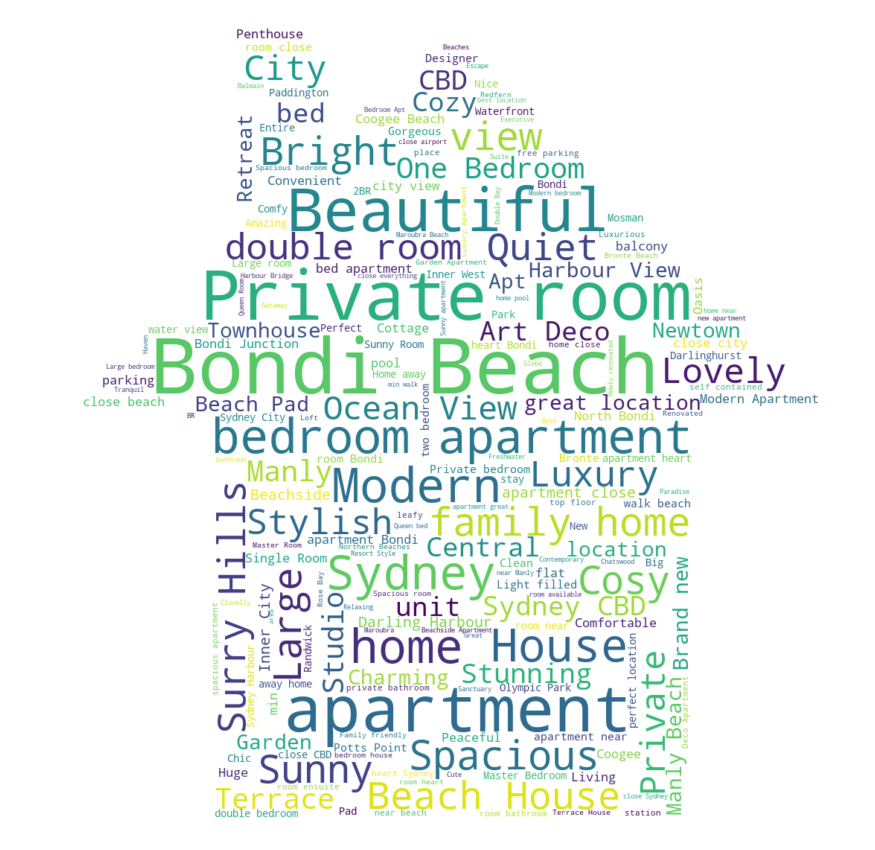

In [20]:
text = " ".join(review for review in airbnb['name'])

stopwords = set(STOPWORDS)
house_mask = np.array(Image.open("/Users/user/Desktop/hosue6.jpg"))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=200, mask=house_mask,
               stopwords=stopwords, contour_width=3, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Most Popular words in listing DESCRIPTION**

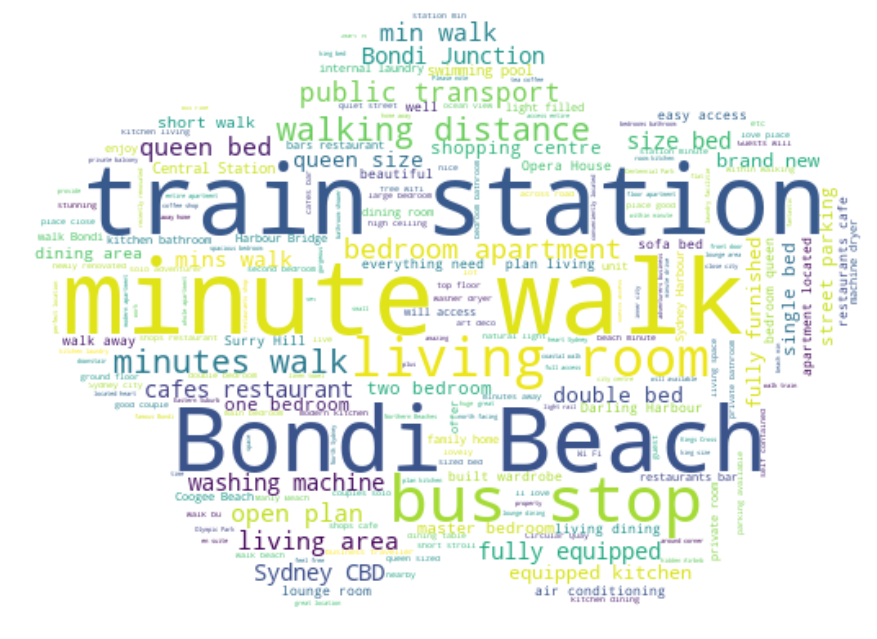

In [21]:
text = " ".join(review for review in airbnb['description'])
stopwords = set(STOPWORDS)
house_mask = np.array(Image.open("/Users/user/Desktop/mask-cloud.png"))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=200, mask=house_mask,
               stopwords=stopwords, contour_width=3, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
airbnb.drop(['name','description'],axis = 1,inplace = True)

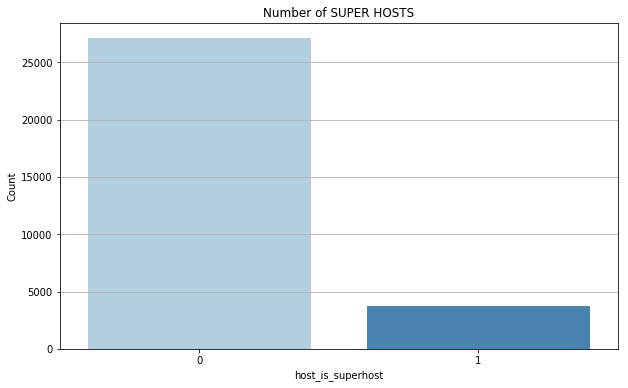

In [23]:
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot(x ='host_is_superhost', palette = 'Blues',
              data = airbnb);
ax.grid(axis = 'y')
plt.title('Number of SUPER HOSTS');
ax.set_ylabel('Count');

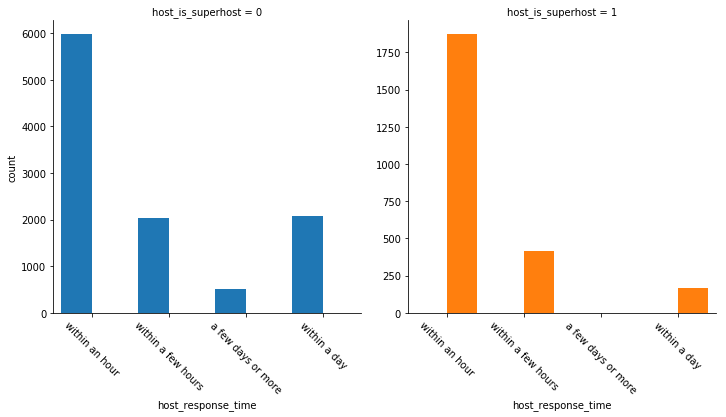

In [24]:
a = sns.catplot(x = 'host_response_time', 
                data = airbnb, 
                kind = 'count', 
                col = 'host_is_superhost', 
                hue = 'host_is_superhost', 
                sharey = False, 
                saturation = 1);

a.set_xticklabels(rotation=-45);

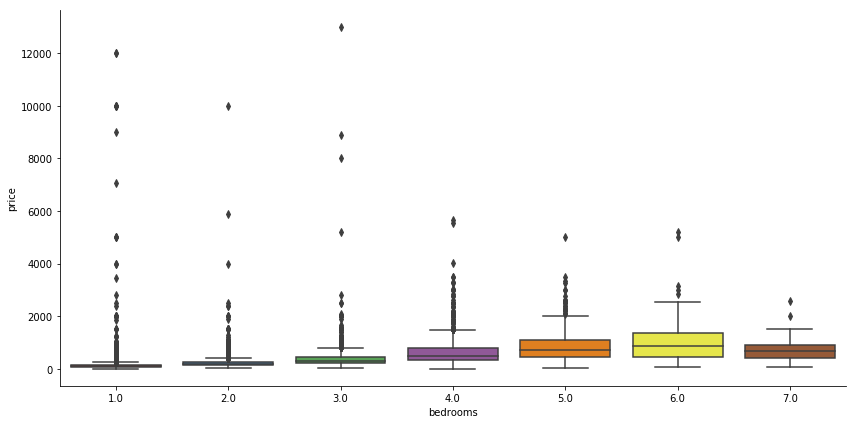

In [25]:
mask = airbnb['bedrooms']<8

sns.catplot(x="bedrooms", y="price", kind="box", 
            data=airbnb[mask], height =6, aspect = 2, 
            palette = 'Set1'
           );

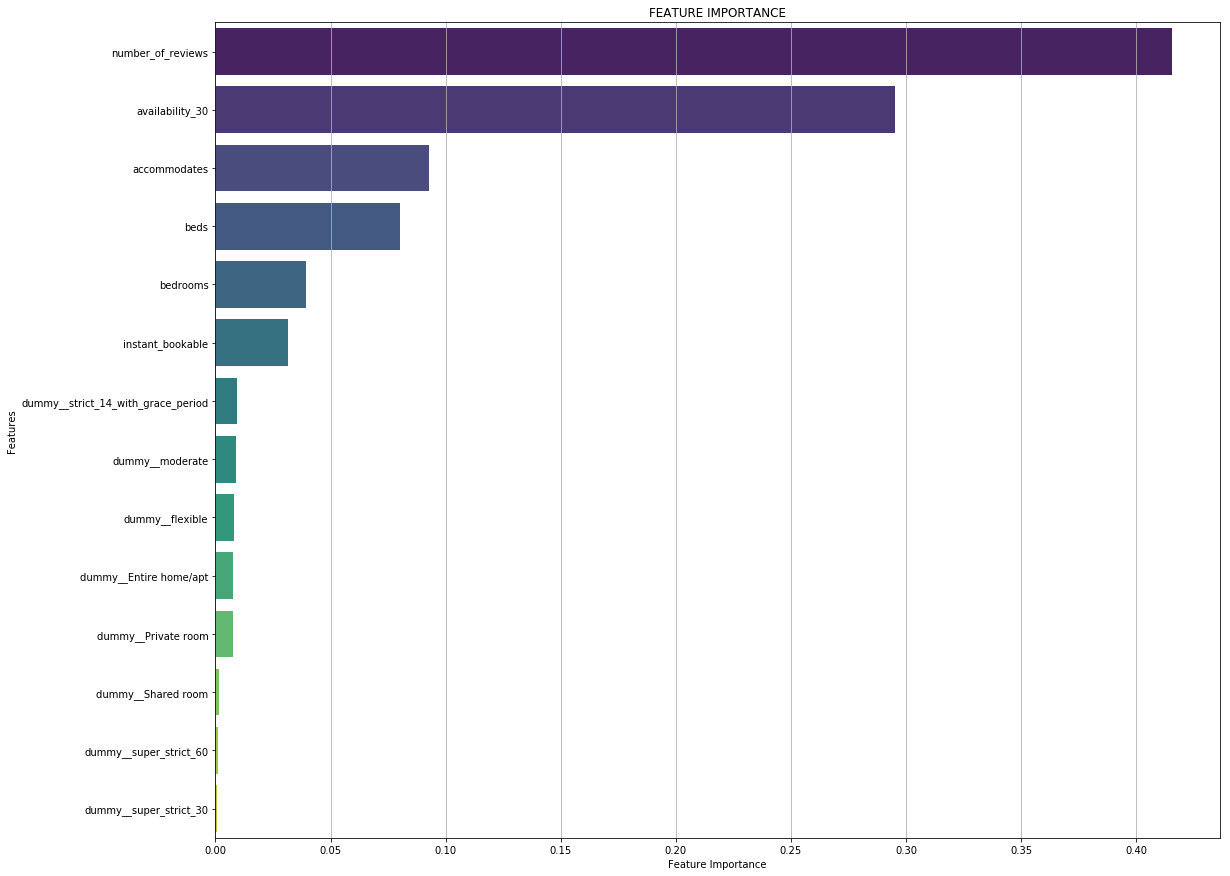

In [26]:
#For Feature Importance
feature_cols = [ 'price', 'accommodates', 'bedrooms', 'beds', 'room_type', 'cancellation_policy', 
                'instant_bookable','number_of_reviews', 'availability_30']

feature_cols = [x for x in feature_cols if x != 'price']
X = airbnb[feature_cols]
X = pd.get_dummies(X, prefix = 'dummy_')
y = airbnb.price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#feature importance using RF
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X, y)
features = X.columns.values

feature_imp = [x for x in zip(features,rf.feature_importances_)]
df = pd.DataFrame(feature_imp)
df.columns = ['features','feature_importance']
df.sort_values(by = 'feature_importance', ascending = False, inplace = True)

fig,ax = plt.subplots(figsize = (18,15))
sns.barplot(x = 'feature_importance' , y ='features', data = df, 
            orient= 'h', palette = 'viridis');
ax.set_ylabel('Features');
ax.set_xlabel('Feature Importance');
ax.grid(axis = 'x')
plt.title("FEATURE IMPORTANCE");

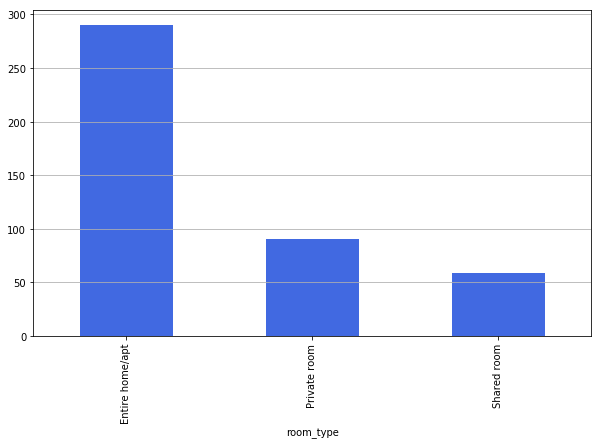

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
airbnb.groupby('room_type')['price'].mean().plot(kind = 'bar', color = 'royalblue');
ax.grid(axis = 'y')

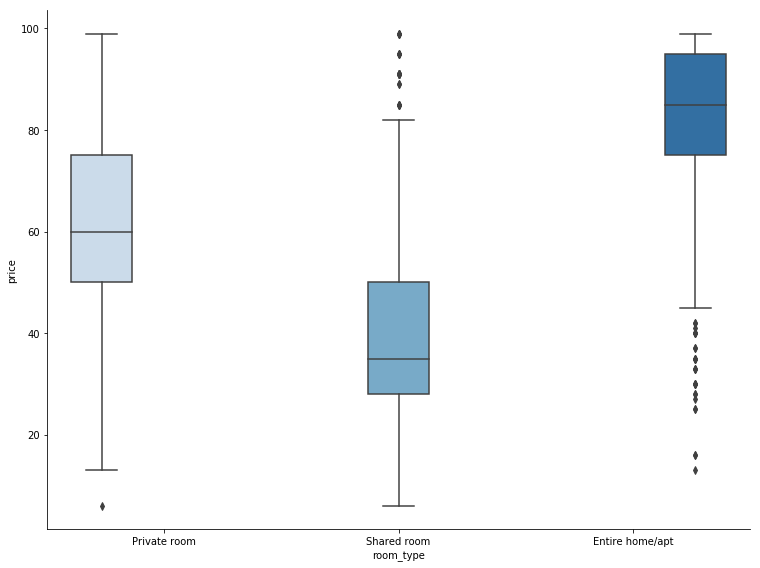

In [28]:
price_mask = airbnb['price']<100
g = sns.catplot(x="room_type", y="price", hue="room_type", height = 8, aspect = 4/3,
                data=airbnb[price_mask], palette = 'Blues', kind = 'box')

In [29]:
#Highest paying and lowest paying streets in Sydney
streets = [x[0] for x in airbnb['street'].str.split(',')]
streets = [x.lower().strip() for x in streets]
airbnb['street_name']= streets

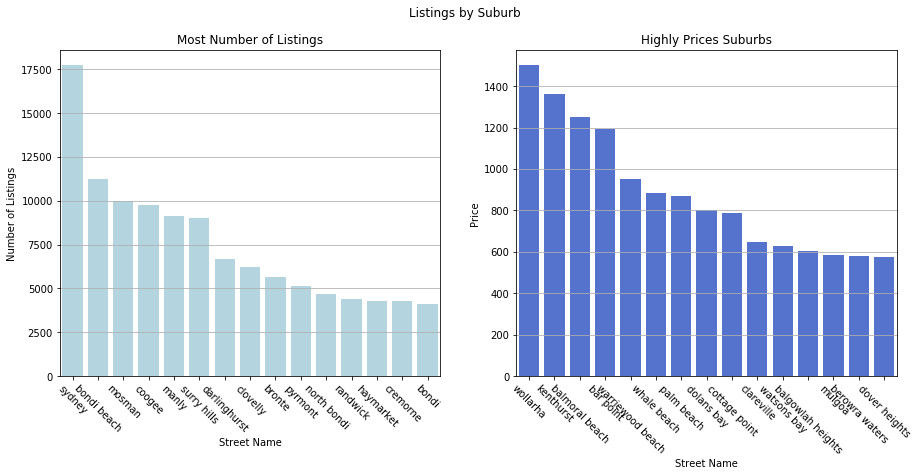

In [30]:
fig,ax = plt.subplots(1,2,figsize = (15,6))

#left-plot
df = pd.DataFrame(airbnb.groupby('street_name')['host_listings_count'].sum(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)

a = sns.barplot(x = 'street_name', y ='host_listings_count', 
            data = df, color = 'lightblue', ax = ax[0]);
ax[0].set_title('Most Number of Listings');
ax[0].set_xlabel('Street Name');
ax[0].set_ylabel('Number of Listings');
ax[0].grid(axis = 'y')
#rotate xticks
for item in a.get_xticklabels():
    item.set_rotation(-45)
    
#right-plot
df = pd.DataFrame(airbnb.groupby('street_name')['price'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)

a = sns.barplot(x = 'street_name', y ='price', 
            data = df, color = 'royalblue', ax = ax[1]);
ax[1].set_title('Highly Prices Suburbs')
ax[1].set_xlabel('Street Name');
ax[1].set_ylabel('Price');
ax[1].grid(axis = 'y')
#rotate xticks
for item in a.get_xticklabels():
    item.set_rotation(-45)
    
plt.suptitle('Listings by Suburb');

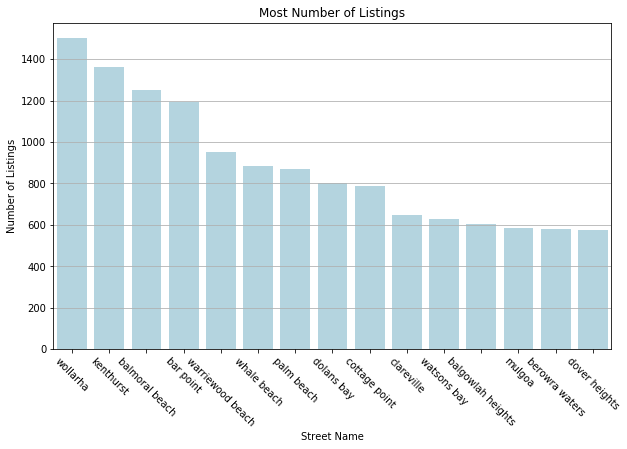

In [31]:
df = pd.DataFrame(airbnb.groupby('street_name')['price'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)

fig,ax = plt.subplots(figsize = (10,6))
a = sns.barplot(x = 'street_name', y ='price', 
            data = df, color = 'lightblue', ax = ax);
plt.title('Most Number of Listings');
ax.set_xlabel('Street Name');
ax.set_ylabel('Number of Listings');
ax.grid(axis = 'y')
#rotate xticks
for item in a.get_xticklabels():
    item.set_rotation(-45)

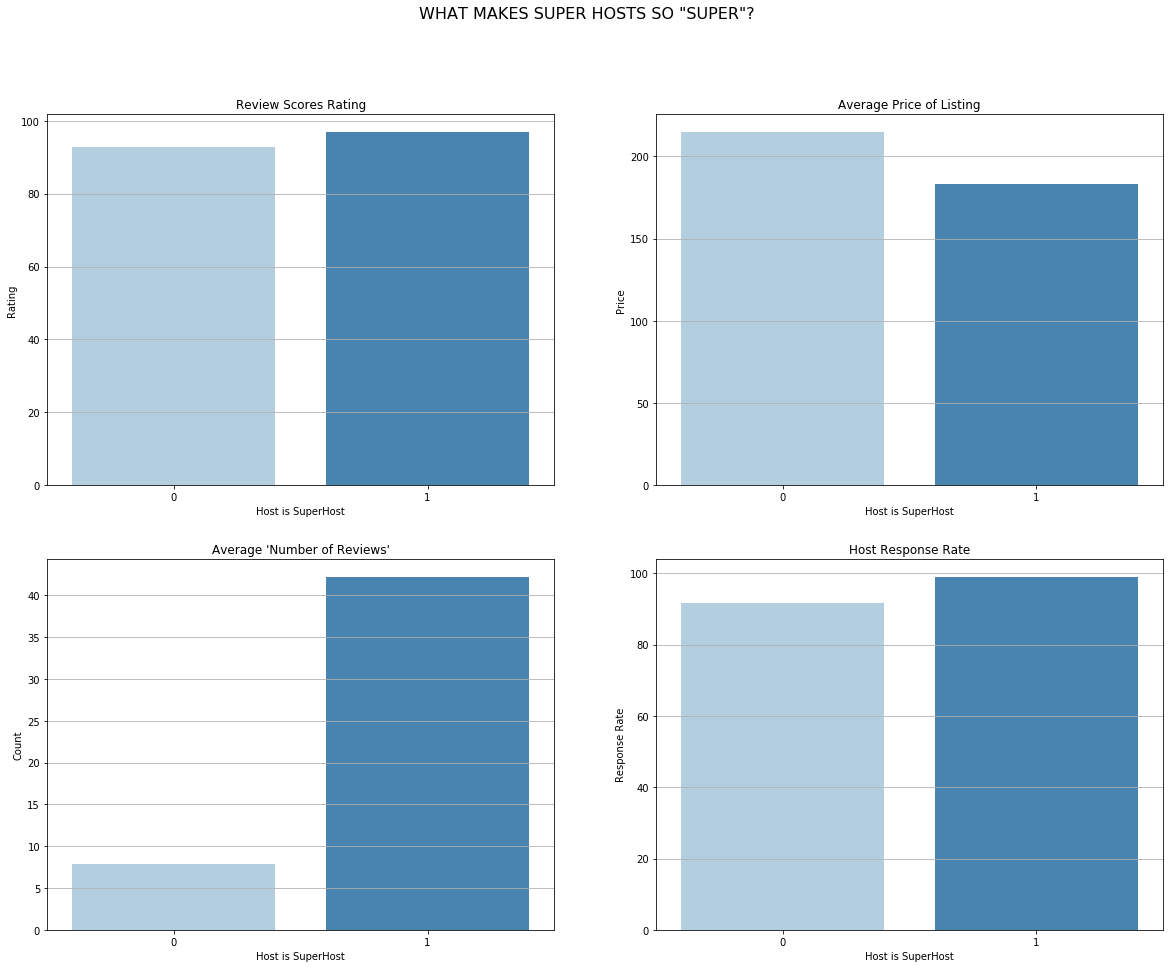

In [32]:
fig,ax = plt.subplots(2,2, figsize = (20,15))

#plot top-left
df = pd.DataFrame(airbnb.groupby('host_is_superhost')['review_scores_rating'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)
a = sns.barplot(x = 'host_is_superhost', y ='review_scores_rating', 
            data = df, palette = 'Blues', color = 'lightblue', ax = ax[0][0]);
ax[0][0].set_title('Review Scores Rating')
ax[0][0].set_xlabel('Host is SuperHost');
ax[0][0].set_ylabel('Rating');
ax[0][0].grid(axis = 'y')

#plot top-right
df = pd.DataFrame(airbnb.groupby('host_is_superhost')['price'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)
a = sns.barplot(x = 'host_is_superhost', y ='price', 
            data = df, palette = 'Blues', color = 'lightblue', ax = ax[0][1]);
ax[0][1].set_title('Average Price of Listing')
ax[0][1].set_xlabel('Host is SuperHost');
ax[0][1].set_ylabel('Price');
ax[0][1].grid(axis = 'y')


#plot bottom-left
df = pd.DataFrame(airbnb.groupby('host_is_superhost')['number_of_reviews'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)
a = sns.barplot(x = 'host_is_superhost', y ='number_of_reviews', 
            data = df, palette = 'Blues', color = 'lightblue', ax = ax[1][0]);
ax[1][0].set_title("Average 'Number of Reviews'")
ax[1][0].set_xlabel('Host is SuperHost');
ax[1][0].set_ylabel('Count');
ax[1][0].grid(axis = 'y')


#plot bottom-right
df = pd.DataFrame(airbnb.groupby('host_is_superhost')['host_response_rate'].mean(). \
                sort_values(ascending = False)[:15])
df.reset_index(inplace = True)
a = sns.barplot(x = 'host_is_superhost', y ='host_response_rate', 
            data = df, palette = 'Blues', color = 'lightblue', ax = ax[1][1]);
ax[1][1].set_title("Host Response Rate")
ax[1][1].set_xlabel('Host is SuperHost');
ax[1][1].set_ylabel('Response Rate');
ax[1][1].grid(axis = 'y')

#plot title
fig.suptitle('WHAT MAKES SUPER HOSTS SO "SUPER"?', fontsize=16);

### SENTIMENTAL ANALYSIS OF REVIEWS

In [33]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [34]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

### GEOPANDAS

In [35]:
# import geopandas as gpd
# from shapely.geometry import Point

# geometry = [Point(xy) for xy in zip(airbnb['longitude'], airbnb['latitude'])]
# stops = gpd.GeoDataFrame(airbnb, geometry=geometry)

# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# sydney =  cities[cities.name == "Sydney"]


# fig, ax = plt.subplots(figsize = (20,20))
# base = sydney.plot(color='black', edgecolor='black', ax = ax)
# stops.plot(ax=base, marker='o', color='red', markersize=0.4);

**Modeling**

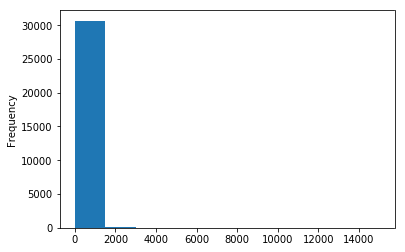

In [36]:
airbnb['price'].plot(kind = 'hist');

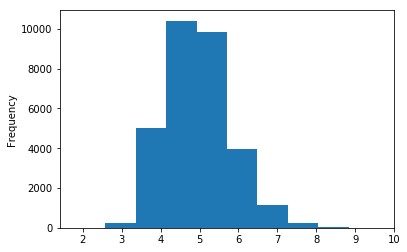

In [37]:
airbnb['log_price'] = np.log(airbnb['price'])
airbnb['log_price'].plot(kind = 'hist');

We will be using `log_price` instead of `price` for our models as the `price` is highly skewed in our dataset.

**Train Test Split**

In [38]:
models = {}
feature_cols = [ 'price', 'accommodates', 'bedrooms', 'beds', 'room_type', 'cancellation_policy', 
                'instant_bookable', 'availability_30','bathrooms','street']

feature_cols = [x for x in feature_cols if x != 'price']
X = airbnb[feature_cols]
X = pd.get_dummies(X, prefix = 'dummy_')
y = airbnb.log_price

print(X_train.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

(24680, 14)


In [39]:
#Error Function
def error_term(clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return median_absolute_error(y_test,y_pred)

**Base Model**

In [40]:
y_pred = [y_test.mean() for x in range(len(y_test))]
mean_error = median_absolute_error(y_test,y_pred)
models['Base Model'] = mean_error
print(mean_error)

0.5668863860254776


**1. Linear Regression**

In [41]:
linreg_error = error_term(LinearRegression())
models['Linear Regression'] = linreg_error
print(linreg_error)

0.25622027109518664


**2. KNeighborsRegressor**

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_error = error_term(knn)
models['KNN'] = knn_error
print(knn_error)

0.28570547989320927


**3. Gradient Boosting Regressor**

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_error = error_term(gbr)
models['Gradient Boosting Regressor'] = gbr_error
print(gbr_error)

0.262381998782955


**4. Ridge Regression**

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_error = error_term(Ridge(alpha = 0.2))
models['Ridge'] = ridge_error
print(ridge_error)

0.25219869520750793


**5. Lasso Regression**

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso_error = error_term(lasso)
models['Lasso'] = lasso_error
print(lasso_error)

0.37934087551073326


In [46]:
model_comparision = pd.DataFrame(models, index = ['Accuracy']).T

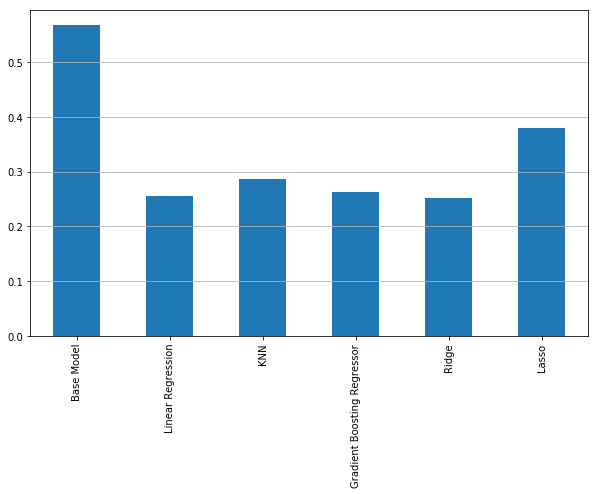

In [47]:
fig,ax =plt.subplots(figsize = (10,6))
model_comparision.plot(kind = 'bar', ax = ax);
ax.grid(axis = 'y')
ax.legend_.remove()